# <center> TP3 : Propagation de paquets d'onde <center>

VILLEGAS Edith, MANGATA Laury

## I - Introduction
Au cours de ce TP, un système dynamique d'espace d'Hilbert $\mathcal{H} = L^2(\mathbb{R},dx)$ et d'Hamiltonien $t \mapsto H(t) = \frac{-\hbar^2}{2m} \frac{d^2}{dx^2} +V(x,t)$ est considéré. L'objectif est de nouveau de réaliser une représentation numérique du système de dimension finie ainsi que l'intégration de l'équation de Schrödinger afin de faire le lien entre les chapitres 1 et 2:
$$ i \hbar \frac{d\psi(t)}{dt} =H(t)\psi(t)$$

Toutefois, cette fois l'équation de Schrödinger prend pour condition initiale un paquet d'ondes , soit : $$\psi(x,t=0)= \frac{1}{\sqrt{2 \pi}}\int \limits_{-\infty}^{+\infty} {\psi_k(t=0)e^{ikx} dk}$$
Ce qui va permettre de réaliser une étude de la propagation de paquets d'onde dans diverses conditions. 
De même, on aura une partition de l'espace ${x_0,...,x_M}$ de pas$\Delta x$ et une partition du temps ${t_0,..., t_M}$ de pas $\Delta t$.


In [239]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import animation
from scipy import linalg as LA2
from numpy import linalg as LA
import scipy.integrate 

# II - Données et fonctions
## 1 - Données générales

In [240]:
imag = complex(0,1)
Npas = 100
m = 1.
hbar = 1

## 2 - Construction de l'hamiltonien en base DVR

In [241]:
def hamiltonien(Npas, xmax):
    HK = np.zeros((Npas,Npas))

    for i in range (0,Npas-1):
        for j in range(0,Npas-1):
            if i==j:
                HK[i,i]=np.pi**2*((Npas+1)**2+2)/(3*xmax**2*2*m)
            else:
                HK[i,j]=((-1)**(j-i)*2*np.pi**2)/(xmax**2*np.sin(((j-i)*np.pi)/(Npas+1))**2*2*m)
    return HK

## 3 - Propagateur
### a) Cas de H constant

In [242]:
def propagate_Hc(psi_0, H, Deltat):
    expH = LA2.expm(-imag*H*Deltat)
    psi = []
    psi.append(psi_0)

    for i in range(0,ntime):
        psi.append(np.matmul(expH,psi[i]))
        
    return psi

### b) Cas de H non-constant

In [352]:
def propagate_Hv(psi_0, V_function, tau):
    expHK = LA2.expm(-imag*HK*Deltat)
    psi = []
    psi.append(psi_0)
    
    for i in range(0,ntime):
        expV = np.diag([np.exp(-imag*V_function(Xd[j],i*Deltat, tau)*Deltat/2) for j in range(Npas)])
        expH = np.matmul(expV, np.matmul(expHK, expV))
        psi.append(np.matmul(expH,psi[i]))
        
    return psi

## 5 - Calcul de probabilités

In [245]:
def probabilities(psi):
    p = []
    for i in range(len(psi)):
        p.append(psi[i]*np.conjugate(psi[i]))
    
    p = np.real(p)
    return p

## 6 - Fonction densité

In [246]:
def densite(p, Xd, time, title):
    fig = plt.figure(figsize=(3,3))
    X, T = np.meshgrid(Xd,time)
    plt.pcolor(X, T, p, cmap = 'hsv')
    plt.title(title, fontweight="bold")
    plt.ylabel("Temps (u.a)")
    plt.xlabel("Espace")
    plt.colorbar()

## III-  Paquet d'ondes dans une boite et carpette quantique
Une particule de masse $m=1u.a$ est considérée dans une boîte d'intervalle $[0,xmax]$ où $xmax$ vaut $10u.a$. La particule est à l'instant initial considéré dans un état de paquet d'ondes gaussien de largeur à mi-hauteur $\sigma_x =0.5u.a$, de centre au milieu de la boîte, et d'impulsion initiale nulle, soit:
$$ \psi (x,t=0)=\frac{1}{\sqrt{\sigma_x\sqrt{2\pi}}}e^{-\frac{(x-\frac{xmax}{2})^2}{4\sigma_x^2}}$$

### 1- Données du systèmes
#### a) Variables spatiales

In [247]:
xmax = 10.
DeltaX = xmax/Npas
Xd = [i*DeltaX for i in range(Npas)]

#### b) Variables temporelles

In [248]:
tmin = 0
tmax = 16.
ntime = 300
Deltat = (tmax-tmin)/ntime
time = [t*Deltat + tmin for t in range(0,ntime+1)]

### 2 - Propagation du paquets d'onde au cours du temps jusqu'à $t_{max}=16 u.a$
#### a) Fonction du potentiel
La fonction de potentiel est définie à $V=0$ en n'imposant aucunes conditions aux limites strictes, soit:

In [249]:
def V(x):
    return 0

Vmat = np.diag([V(Xd[j]) for j in range(0,Npas)])

#### b) Construction de l'Hamiltonien

In [250]:
HK = hamiltonien(Npas, xmax)
H = HK + Vmat

#### c) Représentation de la propagation du paquets d'onde

Text(0.5,1,"Propagation du paquets d'onde au cours du temps")

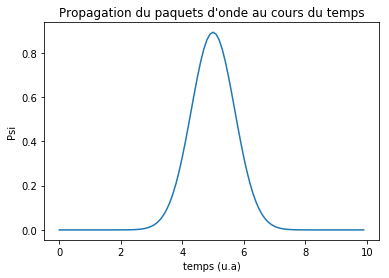

In [251]:
sigmax = 0.5
psi_0 = 1/(np.sqrt(sigmax*np.sqrt(2*np.pi)))*np.exp(-(np.array(Xd)-xmax/2)**2/(4*sigmax**2))
plt.figure()
plt.plot(Xd, psi_0)
plt.xlabel('temps (u.a)')
plt.ylabel('Psi')
plt.title("Propagation du paquets d'onde au cours du temps")

En réalisant la représentation graphique de la propagation du paquets d'ondes au cours du temps jusqu'à $tmax$, il est possible de constater que le paquets d'onde a une propagation gaussienne au cours du temps. Théoriquement, pour un paquets d'onde de type gaussien, le maximum de la gaussienne est centré sur $k_0 = \frac{xmax}{2}$. Ce qui est vérifié expérimentalement car le maximum est centrée à $t=5u.a$ soit : $\frac{xmax}{2}$.

### 3 - Probabilité de présence de la particule au cours du temps
Théoriquement, le paquets d'onde devrait s'étaler jusqu'à ce que la distribution de probabilité soit uniforme sur la boîte. De ce fait, toute information sur l’état initial devrait être perdue, étant donné que le système présente une délocalisation complète. 
À partir de là, une représentation de la probabilité de présence de la particule est réalisée expérimentalement au cours du temps $(x,t) \mapsto |\psi(x,t)|^2$.

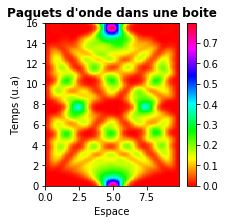

In [252]:
psi = propagate_Hc(psi_0, H, Deltat)
p = probabilities(psi)
densite(p, Xd, time, "Paquets d'onde dans une boite")

Plus les couleurs des zones tendent vers le rouge plus la probabilité de présence est faible. À la différence, plus elles tendent vers le rose plus la probabilité de présence est élevée.

Également, contrairement à ce qui est attendu, l’information initiale de la particule n'est pas totalement perdue. Le paquet d'ondes s'étale et arrive aux bords de la boîte, il est reflété par ceux-ci, et interfère avec lui même. Ce qui montre que  l’information initiale à $t=0 u.a$  reste encodée dans les différences de phase entre les états propres. En effet, comme la boîte est fermée suite aux rebonds des ondes sur les murs, les interférences vont au bout d’un temps $t=16 u.a$ se retrouver à nouveau en phase et faire renaître le paquet d’ondes gaussien initial. Un schéma d’interférences est alors observé que l’on appelle carpette quantique.
Ce phénomène semble contraire au second principe de la thermodynamique parce qu'on observe un état apparemment plus organisé et centrée sur une position x plus spécifique se reconstruire à partir d'un état apparemment plus chaotique, oú la probabilité pour chacun des positions x et plus homogène. 

Ainsi, malgré une impulsion initialement nulle de la particule, le paquets d'ondes s'étale au cours du temps. Ceci est dû au fait que le paquet d'ondes gaussien est composé d'une superposition de plusieurs ondes planes avec diverses valeurs d'impulsion, qui se propagent différement au cours du temps.

En comparant la dynamique quantique à la dynamique classique, il est possible de constater qu'en régime classique, la particule possède une impulsion nulle à l'intant $t=0$ et est positionnée au milieu de la boite. De ce fait, le potentiel étant nulle ($V=0$) la particule restera immobile à la même position. À la différence en dynamique quantique, même si l'impulsion moyenne initiale est de 0, le paquet d'ondes s’étale au cours du temps. La fonction d'onde est modifiée, contrairement à la position moyenne et l'énergie de la particule qui ne changent pas nécessairement. 

## IV - Paquet d'ondes face a une barrière de potentiel
Cette fois-ci, la particule de masse $m=1 u.a$ est sur la droite $\mathbb{R}$ représentée par $[0,x_{max}]$ avec $x_{max}=20 u.a$. De même, une barrière de potentiel est dressée entre $x_0=10 u.a$ et $x_1=11 u.a$, soit:


$$V(x) =\left\{ \begin{array}{r c l} 
0 \qquad x< x_0\\
\quad V_0 \quad x \in [x_0,x_1]\\
0 \qquad si x>x_1
\end{array}
\right.$$


La hauteur de la barrière est définie à $V_0=3 u.a$. De même, l'état initial de particule est défini par un paquet d'ondes gaussien de largeur à mi-hauteur $\sigma_x=0.5 u.a$, de centre $\frac{x_0}{2}= 5 u.a$, et d'impulsion initiale $k_0>0$ ce qui traduit une propagation vers la droite:
$$ \psi(x,t=0)= \frac{1}{\sqrt{\sigma_x\sqrt{2\pi}}}e^{-\frac{(x-\frac{x_0}{2})^2}{4\sigma_x^2}}e^{ik_0x}$$

### 1- Données du système
#### a) Variables spatiales

In [285]:
xmax = 20.
m = 1.
DeltaX = xmax/Npas
Xd = [i*deltax for i in range(Npas)]

#### b) Variables temporels

In [268]:
tmin = 0
tmax = 4
ntime = 100
Deltat = (tmax-tmin)/ntime
time = [t*Deltat + tmin for t in range(0,ntime+1)]

#### c) Autres variables

In [269]:
V0 = 3.
x0 = 10.
x1 = 11.

### 2 - Propagation du paquets d'onde au cours du temps jusqu'à $t_{max}=4 u.a$
#### a) Fonction du potentiel
La fonction de potentiel est définie en utilisant l'expression du potentiel donnée auparavant, soit:

In [279]:
def Vbarriere(x):
    if x0<=x<=x1:
        return V0
    else:
        return 0
Vmatb = np.diag([Vbarriere(Xd[j]) for j in range(0,Npas)])

#### b) Construction de l'Hamiltonien

In [280]:
HK_DVR = hamiltonien(Npas, xmax)
HDVRb = HK_DVR + Vmatb

#### c) Fonction d'onde

In [281]:
def paquet_gaussien(xd, k0):
    psi_gaussien = 1/(np.sqrt(sigmax*np.sqrt(2*np.pi)))*np.exp(-(np.array(Xd)-x0/2)**2/(4*sigmax**2))*np.exp(imag*k0*np.array(Xd))
    return psi_gaussien

#### d) Représentation de la propagation du paquets d'onde
Dans un premier temps, il est nécessaire de déterminer la valeur numérique de $k_E$ qui est donnée par l'expression suivante: $k_E= \frac{\sqrt{2mV_0}}{\hbar}$. Ce qui donne:

In [282]:
kE = np.sqrt(2*m*V0)/hbar
print("La valeur de la constante k_E est alors de",kE)

('La valeur de la constante k_E est alors de', 2.4494897427831779)


À partir de là, la propagation du paquets d'onde est définie pour différentes valeurs de $k_0$ en dessous et au-dessus de la valeur de $k_E$. Ce qui donne alors par la suite les propagations suivantes:

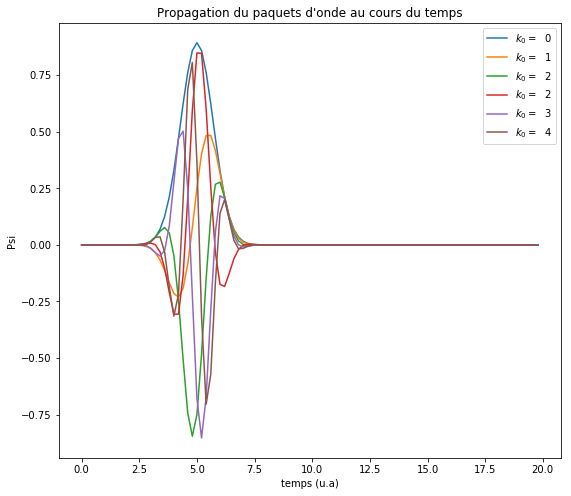

In [346]:
ks = [0, 1, 2, kE, 3, 4]

psi_0_ks =[]
for i in range(len(ks)):
    psi_0_ks.append(paquet_gaussien(Xd, ks[i]))
plt.figure(figsize=(9,8))
for i in range (len(ks)):
    plt.plot(Xd, psi_0_ks[i],label="$k_0 = $%3i"%ks[i])
    plt.xlabel('temps (u.a)')
    plt.ylabel('Psi')
    plt.title("Propagation du paquets d'onde au cours du temps")
    plt.legend(loc = 'upper right')

Plus la valeur de $k_0$ augmente plus le nombre d'oscillations augmente pour la propagation du paquet d'ondes au cours du temps. Toutefois, quelque soit la valeur de $k_0$ le maximum reste inférieur à celle obtenue pour le de $k_0 =0$.

### 3 - Probabilité de présence de la particule au cours du temps
À partir de là, la probabilité de présence de la particule au cours du temps est déterminée pour chaque valeurs de $k_0$. L'objectif étant d'observer l'évolution de la probabilité de présence de la particule par rapport à $k_0$.

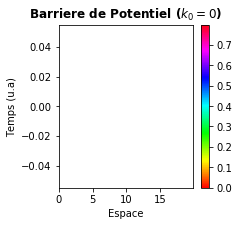

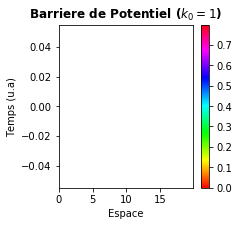

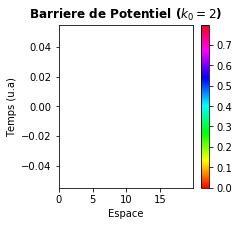

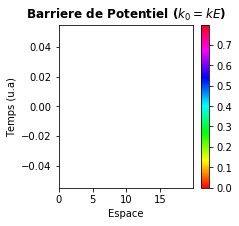

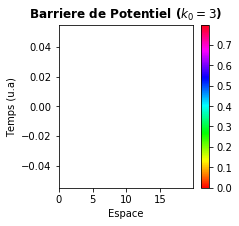

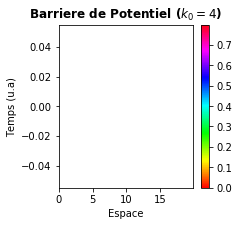

In [284]:
psi_b0 = propagate_Hc(psi_0_ks[0], HDVRb, Deltat)
p_b0 = probabilities(psi_b0)
psi_b1 = propagate_Hc(psi_0_ks[1], HDVRb, Deltat)
p_b1 = probabilities(psi_b1)
psi_b2 = propagate_Hc(psi_0_ks[2], HDVRb, Deltat)
p_b2 = probabilities(psi_b2)
psi_b5 = propagate_Hc(psi_0_ks[5], HDVRb, Deltat)
p_b5 = probabilities(psi_b5)
psi_b3 = propagate_Hc(psi_0_ks[3], HDVRb, Deltat)
p_b3 = probabilities(psi_b3)
psi_b4 = propagate_Hc(psi_0_ks[4], HDVRb, Deltat)
p_b4 = probabilities(psi_b4)

densite(p_b0, Xd, time, "Barriere de Potentiel ($ k_0=0 $)")
densite(p_b1, Xd, time, "Barriere de Potentiel ($ k_0=1 $)")
densite(p_b2, Xd, time, "Barriere de Potentiel ($ k_0=2 $)")
densite(p_b5, Xd, time, "Barriere de Potentiel ($ k_0=kE $)")
densite(p_b3, Xd, time, "Barriere de Potentiel ($ k_0=3 $)")
densite(p_b4, Xd, time, "Barriere de Potentiel ($ k_0=4 $)")

Contrairement à l'étude du cas où le paquet d'ondes est dans une boîte, ici la densité de probabilité de présence de la particule face à une barrière de potentiel diminue au cours du temps. Ce qui signifie que cette fois le paquet d'ondes s'étale jusqu'à ce que l'information initiale de la particule disparaisse. En effet, la boîte n'étant pas fermée les interférences ne se retrouveront plus en phase et le paquet d'ondes ne renaît donc plus. C'est la raison pour laquelle le schéma d'interférences obtenu n'est plus une carpette quantique.

## V - Accélérateur de Fermi quantique
Pour terminer, une dernière étude est réalisée sur l'accélérateur de Fermi quantique. Pour cela, la particule de masse $m=1 u.a$ est cette fois placée dans une boîte $[0,x_{max}]$ avec $x_{max}=20 u.a$. De même, une barrière de potentiel de largeur variable est dressée sur la droite de la boîte :

$$V (x, t) =\left\{ \begin{array}{r c} 0 \quad x< x_{max}-\frac{(x_{max}-x_{min})}{2}(1-cos(\omega t))\\
V_0 \quad x\geq  x_{max}-\frac{(x_{max}-x_{min})}{2}(1-cos(\omega t))
\end{array}
\right.$$
􏰅
Avec $V_0 = 10^{15} u.a$, $\omega = \frac{2\pi}{\tau}$ et $x_{min} = \frac{3}{4}x_{max}$. La particule est alors placée dans un état propre de $H(t = 0)$ à l'instant initial; soit : 

$$ \psi(x,t=0)=\sqrt{\frac{2}{x_{max}}}sin({\frac{p\pi x}{x_{max}}})$$

pour $p \in \mathbb{N}*$

### 1- Données du système
#### a) Variables spatiales

In [290]:
xmax = 20.
m = 1.
DeltaX = xmax/Npas
Xd = [i*DeltaX for i in range(Npas)]

#### b) Variables temporelles

In [291]:
tmin = 0
tmax = 30
ntime = 400
Deltat = (tmax-tmin)/ntime
time = [t*Deltat + tmin for t in range(0,ntime+1)]

#### c) Autres variables

In [292]:
V0 = 10**15
xmin = 3/4*(xmax)

### 2 - Propagation du paquets d'onde au cours du temps jusqu'à $t_{max}=30 u.a$
#### a) Fonction du potentiel
La fonction de potentiel est définie en utilisant l'expression du potentiel donnée auparavant, soit:

In [302]:
def V_fermi(x,t,tau):
    omega = 2*np.pi/tau
    if x < xmax-(xmax-xmin)/2*(1-np.cos(omega*t)):
        return 0
    elif x >= xmax-(xmax-xmin)/2*(1-np.cos(omega*t)):
        return V0

#### b) Construction de l'Hamiltonien

In [303]:
HK_DVR = hamiltonien(Npas, xmax)

#### c) Fonction d'onde

In [304]:
def etat_propre(x,p):
    psi_propre = np.sqrt(2/xmax)*np.sin((p*np.pi*np.array(x))/xmax)
    return psi_propre

#### d) Représentation de la propagation du paquet d'ondes
Pour commencer, une étude de la propagation du paquet d'ondes au cours du temps est réalisée pour différentes valeurs de $\tau$ entre $0.5$ et $30 u.a$ pour $p=1,2$ ou $3$.

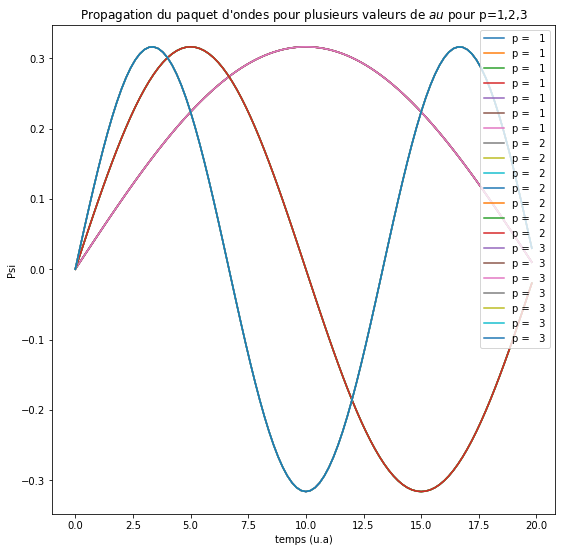

In [348]:
donnees = [1,2,3]
plt.figure(figsize=(9,9))
for i in range (len(donnees)):
    p= donnees[i]
    psi_propre = etat_propre(Xd,p)
    for tau in [1,5,10,15,20,25,30]:
        #plt.figure()
        plt.plot(Xd, psi_propre,label= 'p = %3i' %p)
        plt.xlabel('temps (u.a)')
        plt.ylabel('Psi')
        plt.title("Propagation du paquet d'ondes pour plusieurs valeurs de $\tau$ pour p=1,2,3" )
        plt.legend(loc = 'upper right')

#psi_fermi = propagate_Hv(psi_propre, V_fermi, tau)

Pour des valeurs de $\tau$ comprise entre $0.5$ et $30 u.a$, il est possible de constater que quelque soit la valeur que prend $\tau$, la propagation du paquet d'ondes est la même au cours du temps. Par conséquent, cela signifie que la valeur de $\tau$ n'influe pas sur la propagation du paquet d'ondes au cours du temps.

De même, le lien entre la valeur de $p$ et la propagation du paquet d'ondes est que pour $p=1$ une gaussienne est observée pour la propagation du paquets. Ainsi, pour $p=p+1$ le nombre d'oscillations est de $p$. 

### 3 - Probabilité de présence de la particule au cours du temps
À partir de là, la probabilité de présence de la particule au cours du temps est déterminée pour chaque valeurs de $p$. L'objectif étant d'observer l'influence de $p$ ainsi que de $\tau$ sur la probabilité de présence de la particule au cours du temps.
#### a) Cas où $p=1$:

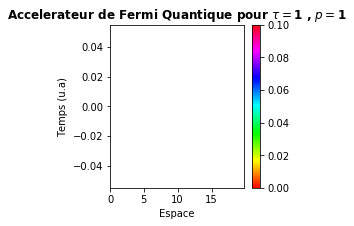

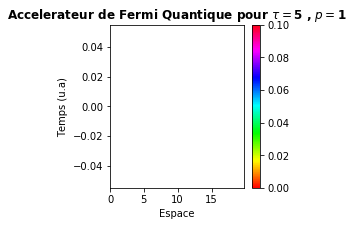

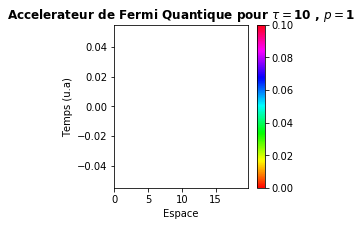

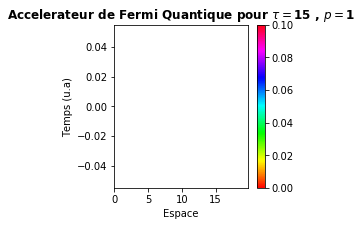

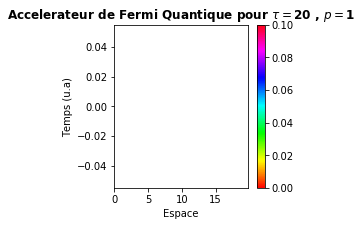

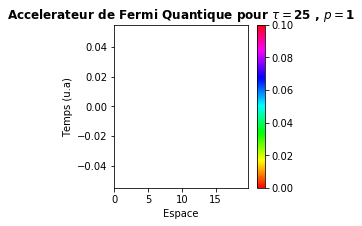

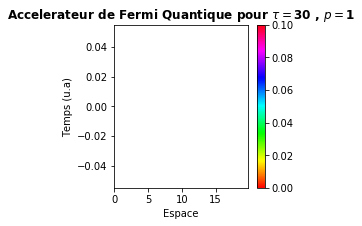

In [356]:
for p in [1]:
    for tau in [1,5,10,15,20,25,30]:
        psi_propre = etat_propre(Xd,p)
        psi_fermi = propagate_Hv(psi_propre, V_fermi, tau)
        
        #Calcul de la probabilités:
        p_f = probabilities(psi_fermi)
        #Graphique de densité:
        densite(p_f, Xd, time, "Accelerateur de Fermi Quantique pour $ \\tau = $"+str(tau)+ " , $ p= $"+str(p))

Pour $p=1$, la probabilité de présence de la particule est plus élevée entre $[5,15]$; celle-ci se situe autour de $0.10$. Lorsqu'on se trouve près de $5$ ou s'approche ou s'éloigne de $15$ la probabilité diminue. De même, au centre de l'intervalle la probabilité de présence semble plus élevée est se situe autour de $0.20$.

Également, plus la valeur de $\tau$ augmente plus la probabilité de présence augmente entre $[0.100,0.175]$ au centre de l'intervalle $[5,15]$. Plus le temps augmente, plus la probabilité de présence se rapproche de $0.175$.

Enfin, des oscillations sont observées sur le graphe de densité. Le nombre de ces oscillations diminuent d'autant la valeur de $\tau$ augmente.

#### b) Cas où $p=2$:

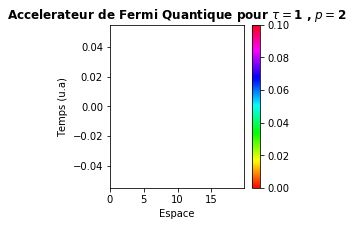

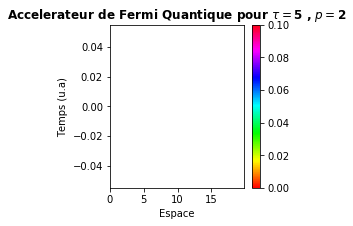

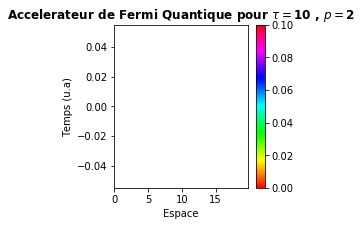

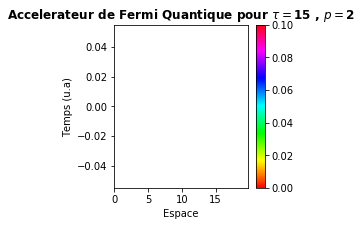

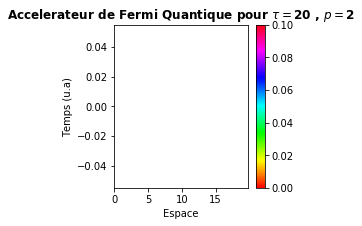

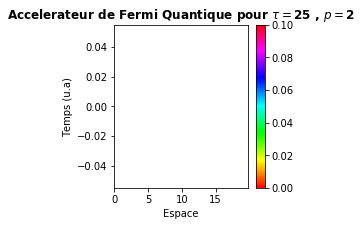

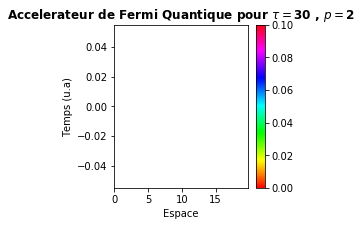

In [358]:
for p in [2]:
    for tau in [1,5,10,15,20,25,30]:
        psi_propre = etat_propre(Xd,p)
        psi_fermi = propagate_Hv(psi_propre, V_fermi, tau)
        
        #Calcul de probabilités: 
        p_f = probabilities(psi_fermi)

        #Graphique de densité:
        densite(p_f, Xd, time, "Accelerateur de Fermi Quantique pour $ \\tau = $"+str(tau)+ " , $ p= $"+str(p))

Pour $p=2$, l'intervalle dans lequel la probabilité de présence de la particule est plus élevée est plus grande que pour $p=1$; où celle-ci reste plus élevée au centre et augmente de plus en plus par rapport au temps.

De même, des oscillations sont de nouveau observées sur le graphe de densité. Le nombre de ces oscillations diminuent d'autant la valeur de $\tau$ augmente.

#### c) Cas où $p=3$:

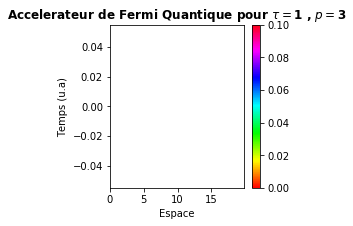

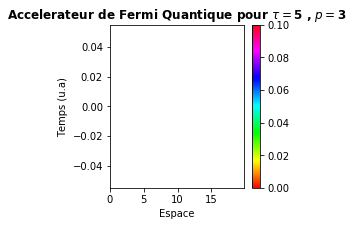

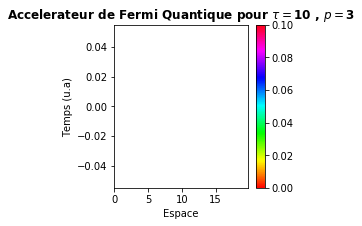

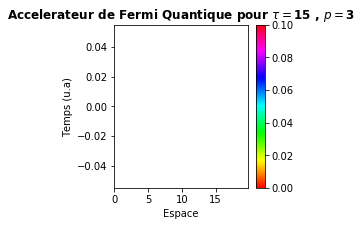

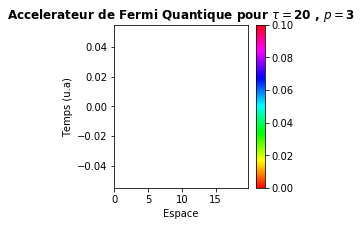

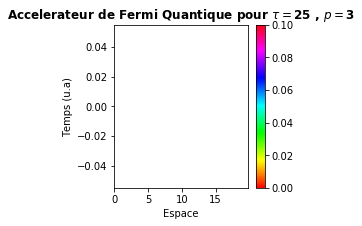

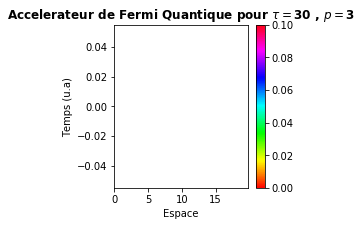

In [359]:
for p in [3]:
    for tau in [1,5,10,15,20,25,30]:
        psi_propre = etat_propre(Xd,p)
        psi_fermi = propagate_Hv(psi_propre, V_fermi, tau)
        
        #Calcul des probabilités:
        p_f = probabilities(psi_fermi)

        #Graphique des densités:
        densite(p_f, Xd, time, "Accelerateur de Fermi Quantique pour $ \\tau = $"+str(tau)+ " , $ p= $"+str(p))

Les mêmes observations sont faites pour le cas où $p=3$. Toutefois, les oscillations sont plus intenses et ce qui implique que la probabilités de présence augmente dans toute la boîte plus $\tau$ augmente. De même, les zones où la probabilité de présence de la particule est plus élevée sont moins visible.

Par conséquent, pour des valeurs de $\tau$ plus grands, la fréquence est plus petite. De même, plus la valeur de $p$ augmente plus les oscilations sont de plus grandes amplitudes pour les faibles valeurs de $\tau$ et sont plus rapides. De même, les oscillations diminuent au cours du temps plus la valeur de $\tau$ augmente.
